# `matplotlib` merging legends

## Imports

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

In [11]:
from matplotlib import font_manager

# And system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

## Data

In [12]:
df = pd.DataFrame.from_dict(
    {
        "mum": {
            "done": 13,
            "not done": 4,
        },
        "dad": {
            "done": 10,
            "not done": 5,
        },
        "daughter": {
            "done": 5,
            "not done": 2,
        },
        "son": {
            "done": 2,
            "not done": 5,
        },
        "dog": {
            "done": 1,
            "not done": 1,
        },
        "fish": {
            "done": 0,
            "not done": 1,
        },
    },
    orient="index"
)

df["total"] = df["done"] + df["not done"]
df["completed"] = df["done"] / df["total"]

df

,done,not done,total,completed
mum,13,4,17,0.764706
dad,10,5,15,0.666667
daughter,5,2,7,0.714286
son,2,5,7,0.285714
dog,1,1,2,0.500000
fish,0,1,1,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, mum to fish
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   done       6 non-null      int64  
 1   not done   6 non-null      int64  
 2   total      6 non-null      int64  
 3   completed  6 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 240.0+ bytes


## Plot 1: two legends

In [14]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 22
    }
)

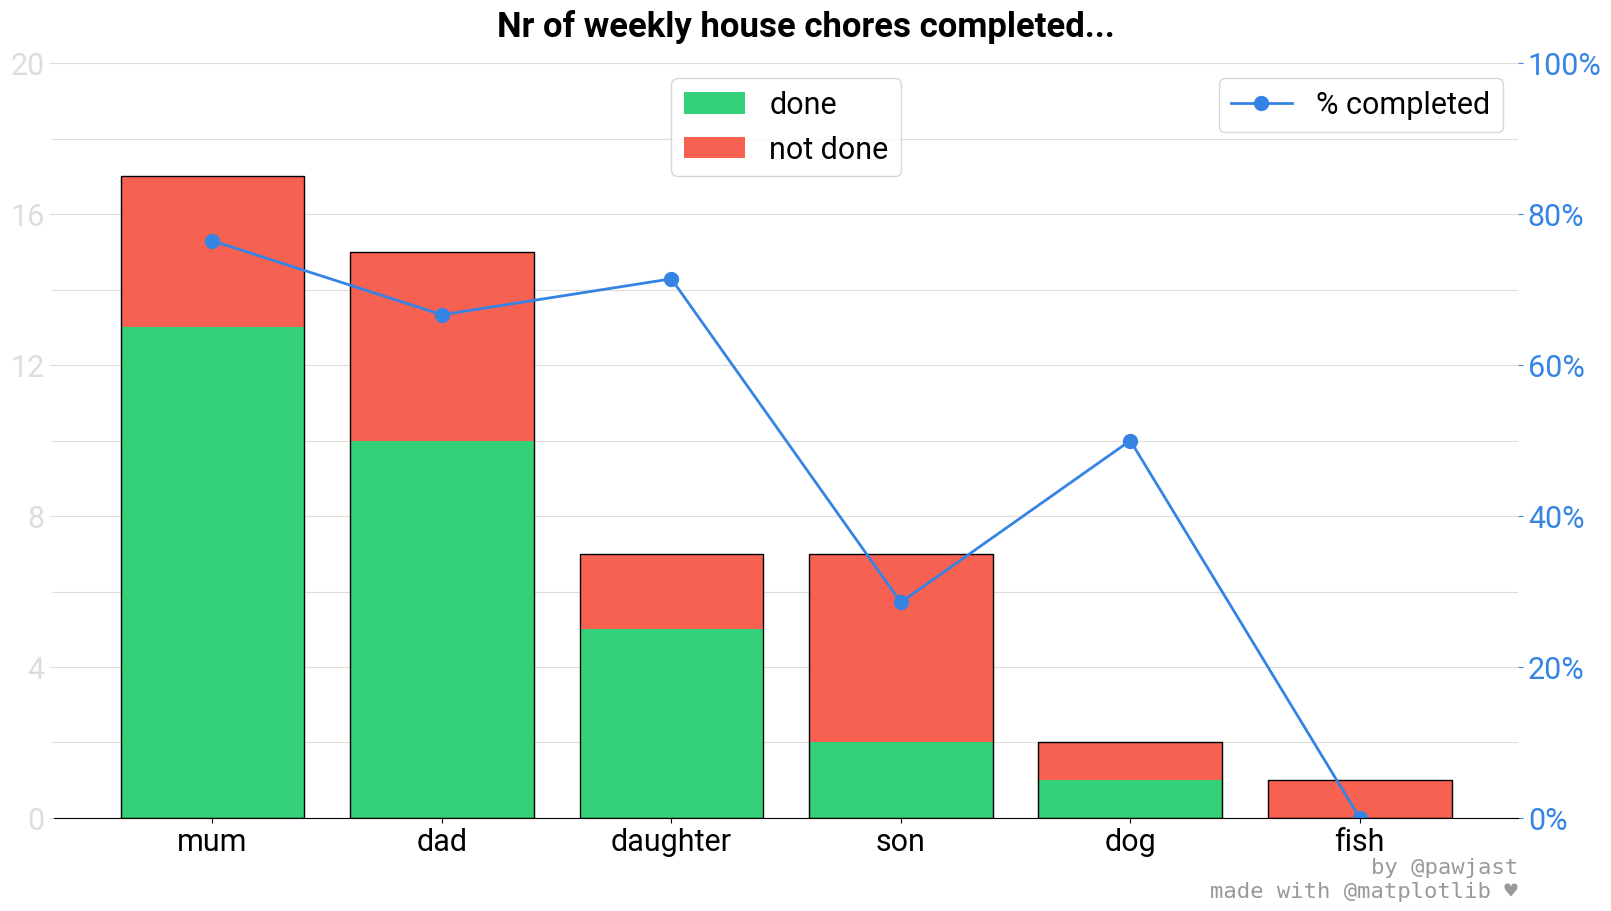

In [15]:
fig, ax = plt.subplots(
    figsize=(16, 9),
    facecolor="white",
    layout="constrained"
)
fig.suptitle(
    "Nr of weekly house chores completed...",
    fontsize=25,
    weight="bold"
)

# --- Primary axis ---
ax.bar(
    x=df.index,
    height=df["done"],
    color="#33d17a",
    label="done"
)
ax.bar(
    x=df.index,
    height=df["not done"],
    bottom=df["done"],
    color="#f66151",
    label="not done"
)
# This is only plotted to get the black edge over the whole bar stack
ax.bar(
    x=df.index,
    height=df["total"],
    color=(1, 1, 1, 0),
    edgecolor="black"
)

ax.set_ylim(0, 20)
ax.set_yticks(
    ticks=range(0, 21, 4),
    minor=False,
)
ax.set_yticks(
    range(2, 21, 4),
    minor=True,
)

ax.tick_params(
    axis="y",
    which="both",
    colors="#deddda",
)

ax.grid(
    axis="y",
    which="both",
    color="#deddda"
)
ax.set_axisbelow(True)
ax.set_frame_on(False)

ax.legend(
    loc="upper center"
)

# --- Secondary axis ---
ax2 = ax.twinx()

ax2.plot(
    df["completed"],
    marker="o",
    markersize=10,
    lw=2,
    color="#3584e4",
    label="% completed"
)


ax2.set_ylim(0, 1)
ax2.set_yticks(
    ticks=np.arange(0, 1.1, 0.2),
    labels=[f"{val:.0%}" for val in np.arange(0, 1.1, 0.2)]
)

ax2.tick_params(
    colors="#3584e4",
)
for position in ["left", "top", "right"]:
    ax2.spines[position].set_visible(False)

ax2.legend(
    loc="upper right"
)

# Footer
ax.text(
    1, -0.11,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="pawjast1.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

## Plot 2: merged legends

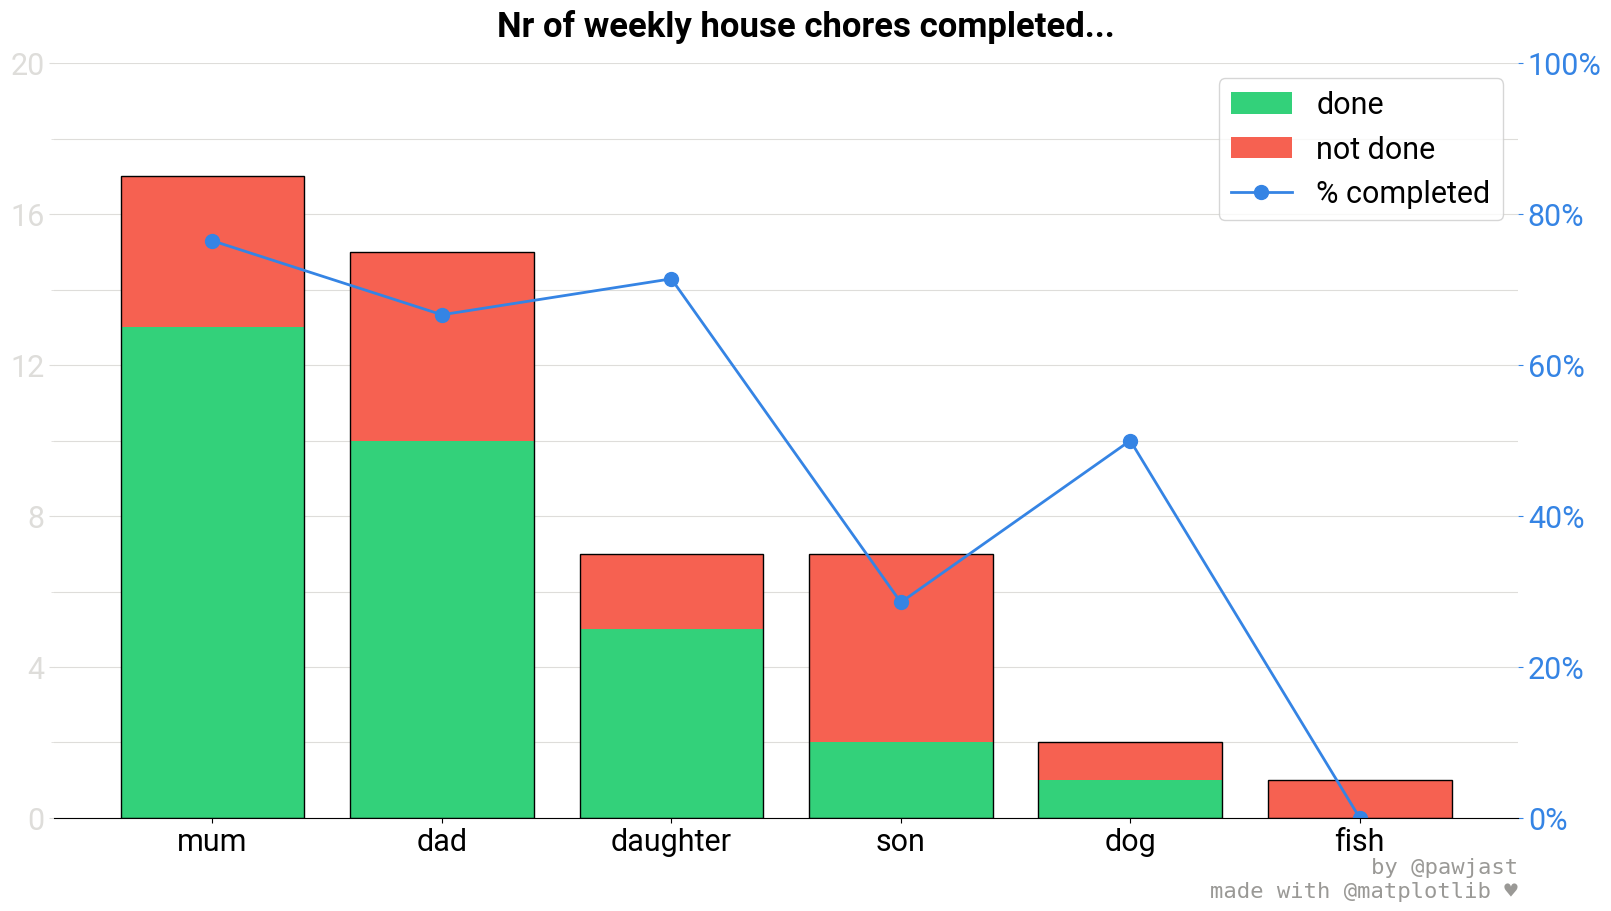

In [16]:
fig, ax = plt.subplots(
    figsize=(16, 9),
    facecolor="white",
    layout="constrained"
)
fig.suptitle(
    "Nr of weekly house chores completed...",
    fontsize=25,
    weight="bold"
)

# --- Primary axis ---
bar_done = ax.bar(
    x=df.index,
    height=df["done"],
    color="#33d17a",
    label="done"
)
bar_not_done = ax.bar(
    x=df.index,
    height=df["not done"],
    bottom=df["done"],
    color="#f66151",
    label="not done"
)
# This is only plotted to get the black edge over the whole bar stack
ax.bar(
    x=df.index,
    height=df["total"],
    color=(1, 1, 1, 0),
    edgecolor="black"
)

ax.set_ylim(0, 20)
ax.set_yticks(
    ticks=range(0, 21, 4),
    minor=False,
)
ax.set_yticks(
    range(2, 21, 4),
    minor=True,
)

ax.tick_params(
    axis="y",
    which="both",
    colors="#deddda",
)

ax.grid(
    axis="y",
    which="both",
    color="#deddda"
)
ax.set_axisbelow(True)
ax.set_frame_on(False)

# --- Secondary axis ---
ax2 = ax.twinx()

line, = ax2.plot(
    df["completed"],
    marker="o",
    markersize=10,
    lw=2,
    color="#3584e4",
    label="% completed"
)


ax2.set_ylim(0, 1)
ax2.set_yticks(
    ticks=np.arange(0, 1.1, 0.2),
    labels=[f"{val:.0%}" for val in np.arange(0, 1.1, 0.2)]
)

ax2.tick_params(
    colors="#3584e4",
)
for position in ["left", "top", "right"]:
    ax2.spines[position].set_visible(False)

# Merge legend
artists = [bar_done, bar_not_done, line]

ax2.legend(
    handles= artists,
    labels=[artist.get_label() for artist in artists],
    loc="upper right"
)

# Footer
ax.text(
    1, -0.11,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="pawjast1.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );